# Analýza a vizualizace dat

- Analýza a vizualizace dat 
    - Nástroje pro platformu Python
    - Pandas
    - Matplotlib
    - Další nástroje (numpy, scikit, ...)

## Úvodní cvičení

### Příprava dat (pro Excel)

> **Zadání**
> 
> Vytvořte homogenní strukturu, na základě které vytvoříte kontingenční tabulku (např. v Excelu) počítající sumu hodin
> - po učebních skupinách v kombinaci s typem lekce
> - po vyučujících v kombinaci s typem lekce
> - ...


Zadání napovídá, že bude potřeba homogenní struktura (tabulka). Je nutné vědět, co to je kontingenční tabulka (pivot table).

> **Povinné video**
>
> [Základy kontingenční tabulky | EduTV 10 min](https://www.youtube.com/watch?v=IWse9RPLDgM)

Zadání současně říká, jaká data musí být přítomna.
- učební skupina
- typ lekce
- délka lekce
- vyučující
- ...
- předmět

Výchozími daty je json soubor, se kterým jsme již dříve pracovali (aplikace rozvrh hodin).


> **Mikroúkol**
>
> Napište funkci pro spojení textů v listu s možností určení oddělovače

In [ ]:
def joinStr(delimiter, strList):
    result = ''
    
    for index, item in enumerate(strList):
        if index == 0:
            result = item
        else:
            result = delimiter + item
    #
    #
    #
    
    return result

print(joinStr(', ', ['A', 'B', 'C']))

> **Řešení**

In [37]:
def joinStr(delimiter, strList):
    result = ''
    for index, item in enumerate(strList):
        if index == 0:
            result = item
        else:
            result = result + delimiter + item
    return result

print(joinStr(', ', ['A', 'B', 'C']))

A, B, C


In [38]:
import json

with open('rozvrh/data.json', encoding='utf-8') as inputFile:
    data = json.load(inputFile)

In [40]:
print(data.keys())

dict_keys(['events', 'occurrencesDays', 'timeslots', 'colors', 'subjects', 'departments', 'groups', 'entryYears', 'students', 'teachers', 'classrooms', 'areas', 'categories', 'spheres', 'lessonForms'])


In [39]:
for index, item in enumerate(data['events']):
    print(item)
    if index > 2:
        break

{'id': '2D2B1C90-F4FF-11EB-9B74-520D00000000', 'typeId': 'F00CB650-9768-11EB-87D2-030800000000', 'startTime': {'hours': 14, 'minutes': 30}, 'endTime': {'hours': 16, 'minutes': 0}, 'dateCode': '2021-11-15', 'date': {'day': 15, 'month': 11, 'year': 2021}, 'categoryId': 1, 'subjectId': 32269, 'subjectName': 'Letecké elektronické systémy II', 'departmentId': 441, 'departmentName': 'FVT-K206', 'topic': '3. Syntéza kmitočtu ', 'topicId': 62645, 'masterId': '62645/2', 'timeslotsId': 1, 'timeslotsName': 'BR', 'lessonOrder': 8, 'lessonFormId': 2, 'lessonFormName': 'CV', 'lessonUnit': 45, 'lessonsCount': 2, 'groupsIds': ['A8CFD4D0-8CA4-11EB-BA48-520D00000000'], 'groupsNames': ['23-3LT-AV-C'], 'groupsEntryYearsIds': [], 'classroomsIds': [331], 'classroomsNames': ['Č1/120'], 'classroomsAreasIds': [2], 'teachersIds': [540], 'teachersNames': ['Němeček, Jiří'], 'teachersDepartmentsIds': [441], 'isLocked': True}
{'id': 'C65A0170-F4FE-11EB-9B74-520D00000000', 'typeId': 'EFAE42A0-9768-11EB-87D2-03080000

Na základě výpisu připravíme mapovací funkci

> **Připomenutí**
> 
> Využití generátorů

In [41]:
def updateData(data):
    for item in data:
        yield item + 1
    
inputData = [1, 2, 3, 4]
resultData = list(updateData(inputData))
print(resultData)

[2, 3, 4, 5]


Implementace funkce

In [42]:
def dataExtractor(events):
    for item in events:
        resultItem = {
            'id': item['id'],
            'subjectName': item['subjectName'] if 'subjectName' in item else 'unknown',
            'departmentName': item['departmentName'] if 'departmentName' in item else 'unknown',
            'topic': item['topic'] if 'topic' in item else 'unknown',
            'lessonFormName': item['lessonFormName'] if 'lessonFormName' in item else 'unknown',
            'lessonsCount': item['lessonsCount'] if 'lessonsCount' in item else 0,
            'groups': joinStr(', ', item['groupsNames']) if 'groupsNames' in item else 'unknown',
        }
        for teacher in item['teachersNames']:
            newResult = {
                **resultItem, 
                'teacher': teacher
            }
            yield newResult
    pass

Podrobnější rozbor

In [48]:
import json

with open('rozvrh/data.json', encoding='utf-8') as inputFile:
    data = json.load(inputFile)
    
for index, item in enumerate(data['events']):
    if index > 2:
        break
    resultItem = {
        'id': item['id'],
        'subjectName': item['subjectName'] if 'subjectName' in item else 'unknown',
        'departmentName': item['departmentName'] if 'departmentName' in item else 'unknown',
        'topic': item['topic'] if 'topic' in item else 'unknown',
        'lessonFormName': item['lessonFormName'] if 'lessonFormName' in item else 'unknown',
        'lessonsCount': item['lessonsCount'] if 'lessonsCount' in item else 0,
        'groups': joinStr(', ', item['groupsNames']) if 'groupsNames' in item else 'unknown'
    } 
    for teacher in item['teachersNames']:
        finalResult = {
            **resultItem,
            'teacher': joinStr(', ', item['teachersNames']) if 'teachersNames' in item else 'unknown'
        }
        print(finalResult)


In [49]:
import json

with open('rozvrh/data.json', encoding='utf-8') as inputFile:
    data = json.load(inputFile)
    
dataForPivotTable = list(dataExtractor(data['events']))
for index, item in enumerate(dataForPivotTable):
    print(item)
    if index > 2:
        break
        

{'id': '2D2B1C90-F4FF-11EB-9B74-520D00000000', 'subjectName': 'Letecké elektronické systémy II', 'departmentName': 'FVT-K206', 'topic': '3. Syntéza kmitočtu ', 'lessonFormName': 'CV', 'lessonsCount': 2, 'groups': '23-3LT-AV-C', 'teacher': 'Němeček, Jiří'}
{'id': 'C65A0170-F4FE-11EB-9B74-520D00000000', 'subjectName': 'Letecké elektronické systémy II', 'departmentName': 'FVT-K206', 'topic': '1. Letecké rádiové přijímače', 'lessonFormName': 'LAB', 'lessonsCount': 2, 'groups': '23-3LT-AV-C', 'teacher': 'Němeček, Jiří'}
{'id': '396CC6C0-F4FF-11EB-9B74-520D00000000', 'subjectName': 'Letecké elektronické systémy II', 'departmentName': 'FVT-K206', 'topic': '3. Syntéza kmitočtu ', 'lessonFormName': 'LAB', 'lessonsCount': 2, 'groups': '23-3LT-AV-C', 'teacher': 'Němeček, Jiří'}
{'id': '7B7F24E0-F4FF-11EB-9B74-520D00000000', 'subjectName': 'Letecké elektronické systémy II', 'departmentName': 'FVT-K206', 'topic': '5. Úhloměrné navigační systémy NDB, VOR, DVOR, TACAN, VORTAC ', 'lessonFormName': 'CV

In [58]:
def getTotal(teacherName, lessonFormName):
    total = 0
    for item in dataForPivotTable:
        if not (item['teacher'] == teacherName):
            continue
        if not (item['lessonFormName'] == lessonFormName):
            continue
        # obě podmínky jsou splněny
        total = total + item['lessonsCount']
    return total

teacherName = 'Štefek, Alexandr'
lessonFormName = 'CV'

print(teacherName, 'CV', getTotal(teacherName, 'CV'))
print(teacherName, 'P', getTotal(teacherName, 'P'))
print(teacherName, 'S', getTotal(teacherName, 'S'))
print(teacherName, 'LC', getTotal(teacherName, 'LC'))

In [60]:
def getTotals(teacherName, lessonFormNames):
    result = {}
    for item in lessonFormNames:
        result[item] = getTotal(teacherName, item)
    return result

teacherName = 'Štefek, Alexandr'
lessonFormNames = ['CV','P','S', 'LC']
print(teacherName, getTotals(teacherName, lessonFormNames))

Štefek, Alexandr {'CV': 2, 'P': 62, 'S': 0, 'LC': 0}


### Kontingenční tabulka

Kontingenční tabulka je tabulka, kde v buňce je zobrazen výsledek agregační funkce aplikované na vektor hodnot, který byl získán z dat filtrací podle filtrů určených sloupcem i řádkem.

In [125]:
rowFilters = {
    'Štefek, A.': lambda item: item['teacher'] == 'Štefek, Alexandr',
    'Ráčil, T.': lambda item: item['teacher'] == 'Ráčil, Tomáš',   
}

colFilters = {
    'P': lambda item: item['lessonFormName'] == 'P',
    'LC': lambda item: item['lessonFormName'] == 'LC',
    'CV': lambda item: item['lessonFormName'] == 'CV',
}

def doubleFilter(filterA, filterB, data):
    for item in data:
        if not filterA(item):
            continue
        if not filterB(item):
            continue
        yield item

for rowIndex, (rowFilterName, rowFilter) in enumerate(rowFilters.items()):
    if rowIndex == 0:
        print('\t', end='')
        for colIndex, (colFilterName, colFilter) in enumerate(colFilters.items()):
            print('\t', colFilterName, end='')
        print('')
    print(rowFilterName, '\t', end='')
    for colIndex, (colFilterName, colFilter) in enumerate(colFilters.items()):
        vectorData = doubleFilter(rowFilter, colFilter, dataForPivotTable)
        print(len(list(vectorData)), '\t', end='')
    print()

		 P	 LC	 CV
Štefek, A. 	19 	0 	1 	
Ráčil, T. 	8 	0 	0 	


> **Zadání**
>
> Vytvořte funkci, která vrací `filters` pro libovolnou položku

```
 filters = {
    'P': lambda item: item['lessonFormName'] == 'P',
    'LC': lambda item: item['lessonFormName'] == 'LC',
    'CV': lambda item: item['lessonFormName'] == 'CV',
}
```


In [133]:
def filterCV(item):
    return item['lessonFormName'] == 'CV'
    
def filterCreator(key, value):    
    def filterCV(item):
        return item[key] == value
    return filterCV
    
def createFilters(itemValues, itemName):
    result = {}
    for itemValue in itemValues:
        result[itemValue] = filterCreator(itemName, itemValue)#lambda item: item[itemName] == itemValue
        
    return result

filters = createFilters(['P', 'LC', 'CV', 'EX'], 'lessonFormName')
print(filters)
filters['CV']({'lessonFormName': 'CV'})

{'P': <function filterCreator.<locals>.filterCV at 0x7f9be3fa29d0>, 'LC': <function filterCreator.<locals>.filterCV at 0x7f9be3fa2040>, 'CV': <function filterCreator.<locals>.filterCV at 0x7f9be3fa2940>, 'EX': <function filterCreator.<locals>.filterCV at 0x7f9be3fa25e0>}


True

In [ ]:
def createFilters(data, itemName):
    result = {}
    #
    # pro vsechny polozky v data:
        # jestlize NECO:
            # neco ## pozor, tady je zaludnost lambda nebude stacit PROC?
    #
    return result

> **Řešení**

In [134]:
def createFilter(itemName, itemValue):
    return lambda c: c[itemName] == itemValue

def createFilters(data, itemName):
    result = {}
    for row in data:
        itemValue = row[itemName]
        if itemValue in result:
            continue
        result[itemValue] = createFilter(itemName, itemValue)
    return result

filters = createFilters(dataForPivotTable, 'lessonFormName')
for key, value in filters.items():
    print(key, '\t', value)

CV 	 <function createFilter.<locals>.<lambda> at 0x7f9c0ca0d820>
LAB 	 <function createFilter.<locals>.<lambda> at 0x7f9bfefd5af0>
unknown 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2d30>
P 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2160>
SEM 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2280>
PV 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2c10>
EX 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2700>
PX 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2670>
KON 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa24c0>
TER 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2310>
SMP 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2790>
SZK 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2820>
J 	 <function createFilter.<locals>.<lambda> at 0x7f9be3fa2b80>
KRZ 	 <function createFilter.<locals>.<lambda> at 0x7f9c01eff160>
STŽ 	 <function createFilter.<locals>.<lambda> at 0x7f9c01effa60>
ZK 	 <function

Otestujte si své řešení!

In [135]:
filters = createFilters(dataForPivotTable, 'lessonFormName') 
filters['CV']({'lessonFormName': 'CV'})

True

Využijte své řešení pro generování filtrů pro jinou položku

In [136]:
depFilters = createFilters(dataForPivotTable, 'departmentName') 
print(depFilters.keys())
depFilters

dict_keys(['FVT-K206', 'unknown', 'FVL-K102', 'FVL-K111', 'FVT-K205', 'FVT-K202', 'FVT-K216', 'FVZ-K301', 'FVZ-K308', 'FVL-K105', 'FVT-K201', 'FVT-K209', 'CBVSS', 'FVT-K207', 'FVT-K217', 'FVT-K208', 'FVL-K109', 'FVL-K108', 'FVL-K101', 'CJV', 'FVT-K215', 'CTVS', 'FVL-K110', 'FVL-K104', 'FVT-K210', 'FVZ-K302', 'FVT-K203', 'ÚOPZHN', 'FVL-K107', 'FVZ-K306', 'FVZ-K305', 'FVZ-K304', 'FVZ-K307', 'FVZ-K303', 'FVT-K211'])


{'FVT-K206': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'unknown': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVL-K102': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVL-K111': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K205': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K202': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K216': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVZ-K301': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVZ-K308': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVL-K105': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K201': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K209': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'CBVSS': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K207': <function __main__.createFilter.<locals>.<lambda>(c)>,
 'FVT-K217': <function __main__.createFilter.<locals

> **Zadání (na doma :)**
>
> Vytvořte funkci která vygeneruje kontingenční tabulku

In [ ]:
def kontingencniTabulka(dataRecords, cellItemName, rowItemName, colItemName, aggregationFunc):
    # vytvor filtry pro radky
    # vytvor filtry pro sloupce
    
    # pro vsechny radkove filtry
        # je-li radek prvnim (s nultym indexem)
            # neco
            # neco
        # pro vsechny sloupcove filtry
            # je-li sloupec prvnim (s nultym indexem)
                # yield
            # filtruj dataRecords na podminky rowFilter & colFilter
            # agreguj data ze ziskaneho vektoru
            # yield agregovanou hodnotu

> **Zadání (na doma :) II**
>
> Upravte funkci do tvaru, níže
>
> Uveďte důvody pro využití této definice

In [ ]:
def kontingencniTabulkaDefinition(cellItemName, rowItemName, colItemName, aggregationFunc):
    # vytvor filtry pro radky
    # vytvor filtry pro sloupce

    def create(dataRecords):

        # pro vsechny radkove filtry
            # je-li radek prvnim (s nultym indexem)
                # neco
                # neco
            # pro vsechny sloupcove filtry
                # je-li sloupec prvnim (s nultym indexem)
                    # yield
                # filtruj dataRecords na podminky rowFilter & colFilter
                # agreguj data ze ziskaneho vektoru
                # yield agregovanou hodnotu
    return create

## Pandas

Pandas je jedna z největších knihoven pro Python. Jedná se o opensource! 
Dokumentaci lze nalézt [zde](https://pandas.pydata.org/).

> **Doporučené video**
>
> [Complete Python Pandas Data Science Tutorial! 1h](https://www.youtube.com/watch?v=vmEHCJofslg)


### DataFrame

Jedním ze základních prvků je [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

Zobrazíme si získaná data v tabulkové podobě.

In [61]:
import json
import pandas as pd

with open('rozvrh/data.json', encoding='utf-8') as inputFile:
    data = json.load(inputFile)
    
df = pd.DataFrame(dataExtractor(data['events']))
df

,id,subjectName,departmentName,topic,lessonFormName,lessonsCount,groups,teacher
0,2D2B1C90-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,CV,2,23-3LT-AV-C,"Němeček, Jiří"
1,C65A0170-F4FE-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,1. Letecké rádiové přijímače,LAB,2,23-3LT-AV-C,"Němeček, Jiří"
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,LAB,2,23-3LT-AV-C,"Němeček, Jiří"
3,7B7F24E0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,"5. Úhloměrné navigační systémy NDB, VOR, DVOR,...",CV,2,23-3LT-AV-C,"Andrle, Miloš"
4,04E49860-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,2. Letecké rádiové vysílače,LAB,2,23-3LT-AV-C,"Němeček, Jiří"
...,...,...,...,...,...,...,...,...
69258,0750ACE9-323D-4E14-B3CC-ABCDF66F96C2,unknown,FVL-K105,Válečné studie,ZK,0,"5D, 5DVZS, 5CH, 5MIZ, 5MT, 5PZ, 5ŘFZ, 5ŘLZ, 5V...","Staněk, Jaroslav"
69259,DFB9C331-9C9C-4485-B06F-ACCB19E4757E,unknown,FVL-K102,Management,ZK,0,"12-5ŘPOS1, 12-5ŘPOS2, 12-5ŘPOS3, 12-5ŘPOS4, 12...","Richter, Jiří"
69260,3292D722-AC2B-49B8-8E48-5B4EFF2084A2,unknown,FVT-K217,Základy elektrotechniky,ZK,0,"22-3GMOB-C, 22-3LT-C, 22-3TOMO-C, 22-3ZM-C LAB...","Kohl, Zdeněk"
69261,89D2BBB0-F582-4B6C-B8DB-D1D7D0F789CA,unknown,FVT-K217,Základy elektrotechniky,ZK,0,"22-3GMOB-C, 22-3LT-C, 22-3TOMO-C, 22-3ZM-C LAB...","Kohl, Zdeněk"


### Projekce

#### Zobrazení jednoho sloupce

In [139]:
print(type(df['subjectName']))
df['subjectName']

<class 'pandas.core.series.Series'>


0        Letecké elektronické systémy II
1        Letecké elektronické systémy II
2        Letecké elektronické systémy II
3        Letecké elektronické systémy II
4        Letecké elektronické systémy II
                      ...               
69258                            unknown
69259                            unknown
69260                            unknown
69261                            unknown
69262                            unknown
Name: subjectName, Length: 69263, dtype: object

In [141]:
df.iloc[0:, [0, 1, 2, 3]]

,id,subjectName,departmentName,topic
0,2D2B1C90-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu
1,C65A0170-F4FE-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,1. Letecké rádiové přijímače
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu
3,7B7F24E0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,"5. Úhloměrné navigační systémy NDB, VOR, DVOR,..."
4,04E49860-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,2. Letecké rádiové vysílače
...,...,...,...,...
69258,0750ACE9-323D-4E14-B3CC-ABCDF66F96C2,unknown,FVL-K105,Válečné studie
69259,DFB9C331-9C9C-4485-B06F-ACCB19E4757E,unknown,FVL-K102,Management
69260,3292D722-AC2B-49B8-8E48-5B4EFF2084A2,unknown,FVT-K217,Základy elektrotechniky
69261,89D2BBB0-F582-4B6C-B8DB-D1D7D0F789CA,unknown,FVT-K217,Základy elektrotechniky


#### Zobrazení "vybraných sloupců". Indexem dataframe je list názvů sloupců.

In [82]:
df[['id', 'subjectName']]

,id,subjectName
0,2D2B1C90-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II
1,C65A0170-F4FE-11EB-9B74-520D00000000,Letecké elektronické systémy II
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II
3,7B7F24E0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II
4,04E49860-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II
...,...,...
69258,0750ACE9-323D-4E14-B3CC-ABCDF66F96C2,unknown
69259,DFB9C331-9C9C-4485-B06F-ACCB19E4757E,unknown
69260,3292D722-AC2B-49B8-8E48-5B4EFF2084A2,unknown
69261,89D2BBB0-F582-4B6C-B8DB-D1D7D0F789CA,unknown


#### Vytvoření nového sloupce

In [142]:
df['duration'] = df['lessonsCount'] * 45
df

,id,subjectName,departmentName,topic,lessonFormName,lessonsCount,groups,teacher,duration,departmentCode
0,2D2B1C90-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,CV,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
1,C65A0170-F4FE-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,1. Letecké rádiové přijímače,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
3,7B7F24E0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,"5. Úhloměrné navigační systémy NDB, VOR, DVOR,...",CV,2,23-3LT-AV-C,"Andrle, Miloš",90,K206
4,04E49860-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,2. Letecké rádiové vysílače,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
...,...,...,...,...,...,...,...,...,...,...
69258,0750ACE9-323D-4E14-B3CC-ABCDF66F96C2,unknown,FVL-K105,Válečné studie,ZK,0,"5D, 5DVZS, 5CH, 5MIZ, 5MT, 5PZ, 5ŘFZ, 5ŘLZ, 5V...","Staněk, Jaroslav",0,K105
69259,DFB9C331-9C9C-4485-B06F-ACCB19E4757E,unknown,FVL-K102,Management,ZK,0,"12-5ŘPOS1, 12-5ŘPOS2, 12-5ŘPOS3, 12-5ŘPOS4, 12...","Richter, Jiří",0,K102
69260,3292D722-AC2B-49B8-8E48-5B4EFF2084A2,unknown,FVT-K217,Základy elektrotechniky,ZK,0,"22-3GMOB-C, 22-3LT-C, 22-3TOMO-C, 22-3ZM-C LAB...","Kohl, Zdeněk",0,K217
69261,89D2BBB0-F582-4B6C-B8DB-D1D7D0F789CA,unknown,FVT-K217,Základy elektrotechniky,ZK,0,"22-3GMOB-C, 22-3LT-C, 22-3TOMO-C, 22-3ZM-C LAB...","Kohl, Zdeněk",0,K217


In [89]:
type(df['duration'])

pandas.core.series.Series

In [91]:
for index, item in enumerate(df['duration']):
    print(index, item)
    if index > 2:
        break

0 90
1 90
2 90
3 90


#### Uživatelsky definovaná funkce

In [143]:
def userFunc(pdSeries):
    result = []
    for item in pdSeries:
        result.append(item[4:])
    return result

df['departmentCode'] = userFunc(df['departmentName'])
df['departmentCode']

0        K206
1        K206
2        K206
3        K206
4        K206
         ... 
69258    K105
69259    K102
69260    K217
69261    K217
69262    K217
Name: departmentCode, Length: 69263, dtype: object

In [144]:
df['departmentCode'] = list(map(lambda item: item[4:], df['departmentName']))
df['departmentCode']

0        K206
1        K206
2        K206
3        K206
4        K206
         ... 
69258    K105
69259    K102
69260    K217
69261    K217
69262    K217
Name: departmentCode, Length: 69263, dtype: object

In [95]:
df['departmentCode'] = [item[4:] for item in df['departmentName']]
df['departmentCode']

0        K206
1        K206
2        K206
3        K206
4        K206
         ... 
69258    K105
69259    K102
69260    K217
69261    K217
69262    K217
Name: departmentCode, Length: 69263, dtype: object

### Selekce

#### Přímý index

In [113]:
df.loc[[2]]

,id,subjectName,departmentName,topic,lessonFormName,lessonsCount,groups,teacher,duration,departmentCode
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206


In [114]:
df.loc[range(2, 7)]

,id,subjectName,departmentName,topic,lessonFormName,lessonsCount,groups,teacher,duration,departmentCode
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
3,7B7F24E0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,"5. Úhloměrné navigační systémy NDB, VOR, DVOR,...",CV,2,23-3LT-AV-C,"Andrle, Miloš",90,K206
4,04E49860-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,2. Letecké rádiové vysílače,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
5,9A434300-1B6C-11EC-916D-030800000000,unknown,unknown,unknown,unknown,0,,"Leuchter, Jan",0,own
6,9A3BF000-1B6C-11EC-916D-030800000000,unknown,unknown,unknown,unknown,0,,"Leuchter, Jan",0,own


#### Podmínka

Všimněte si přímé komparace vybraného sloupce s výrazem

In [84]:
df['lessonsCount'] > 0

0         True
1         True
2         True
3         True
4         True
         ...  
69258    False
69259    False
69260    False
69261    False
69262    False
Name: lessonsCount, Length: 69263, dtype: bool

Zobrazení vybraných řádků, parametrem je vektor logických proměnných.

In [147]:
df[df['lessonsCount'] > 0]

,id,subjectName,departmentName,topic,lessonFormName,lessonsCount,groups,teacher,duration,departmentCode
0,2D2B1C90-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,CV,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
1,C65A0170-F4FE-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,1. Letecké rádiové přijímače,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
2,396CC6C0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,3. Syntéza kmitočtu,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
3,7B7F24E0-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,"5. Úhloměrné navigační systémy NDB, VOR, DVOR,...",CV,2,23-3LT-AV-C,"Andrle, Miloš",90,K206
4,04E49860-F4FF-11EB-9B74-520D00000000,Letecké elektronické systémy II,FVT-K206,2. Letecké rádiové vysílače,LAB,2,23-3LT-AV-C,"Němeček, Jiří",90,K206
...,...,...,...,...,...,...,...,...,...,...
69246,84ECDED0-0B09-11EC-8109-E50100000000,Pravděpodobnost a statistika,FVL-K101,14. Aplikace statistických metod v bezpečnostn...,CV,2,12-5ŘPOS2,"Lacinová, Veronika",90,K101
69247,E579D940-0B06-11EC-8109-E50100000000,Pravděpodobnost a statistika,FVL-K101,2. Popisná statistika,CV,2,12-5ŘPOS2,"Lacinová, Veronika",90,K101
69248,AE5220D0-0B06-11EC-8109-E50100000000,Pravděpodobnost a statistika,FVL-K101,1. Základní statistické pojmy,CV,2,12-5ŘPOS2,"Lacinová, Veronika",90,K101
69249,57EA4410-0B07-11EC-8109-E50100000000,Pravděpodobnost a statistika,FVL-K101,"4. Pravděpodobnost – 2. část (podmíněná pst, p...",CV,2,12-5ŘPOS2,"Lacinová, Veronika",90,K101


#### Uživatelsky definovaná funkce

### Pivot Table

In [64]:
import numpy as np
pd.pivot_table(df, values='lessonsCount', index=['departmentName'], columns=['lessonFormName'], aggfunc=np.sum, fill_value='')

lessonFormName,CV,EX,J,KOL,KON,KRZ,LAB,P,PV,PX,SEM,SMP,STŽ,SZK,TER,ZK,unknown
departmentName,,,,,,,,,,,,,,,,,
CBVSS,2966.0,,2.0,,5462.0,,266.0,1798.0,,,3748.0,157.0,,,144.0,0.0,
CJV,219344.0,,,,,,,96.0,,,80.0,,,,,,
CTVS,1195152.0,,,,,,,848.0,109850.0,,,,,,,0.0,
FVL-K101,458.0,,,,,,,618.0,,,34.0,,,,,0.0,
FVL-K102,1390.0,,,,,,,1160.0,6400.0,,1105.0,,,0.0,,0.0,
FVL-K104,1038.0,,,,,,,659.0,,,1358.0,,,,,,
FVL-K105,470.0,82.0,,,,,,3318.0,,12872.0,1840.0,,,,270.0,0.0,
FVL-K107,445.0,,,,,,,364.0,5360.0,,22.0,,,0.0,,,
FVL-K108,268.0,,,,,,,120.0,5367.0,,96.0,,,,,0.0,


### Vizualizace

## Matplotlib

### Intro

Matplotlib je knihovna, která spolu s numpy a pandas patří do "velké trojice" podporující datové analýzy.

Dokumentace spolu s mnoha příklady a galerií je dostupná zde [https://matplotlib.org/](https://matplotlib.org/)

### Liniové grafy

Pravděpodobně prvním typem grafu, se kterým jste se v životě setkali je zobrazení závislosti $y$ na $x$. Tuto závislost jste pravděpodobně vykreslovali pomocí spojité křivky.

Pro její vykreslení jste měli sadu hodnot pro $x$ a odpovídající sadu hodnot pro $y$.

In [1]:
def f(x):
    return x * x

In [3]:
xx = list(range(1, 10, 1))
yy = [f(x) for x in xx]
print(xx, yy)

[1, 2, 3, 4, 5, 6, 7, 8, 9] [1, 4, 9, 16, 25, 36, 49, 64, 81]


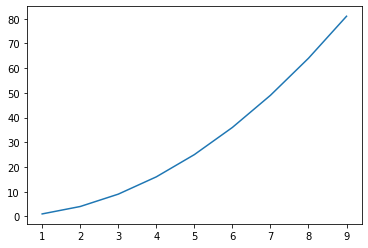

In [4]:
import matplotlib.pyplot as plt

plt.plot(xx, yy)

Všimněte si, že:
- křivka je zobrazena jako posloupnost úseček
- není zachována proporcionalita os

Při zobrazení se vždy používají úsečky, které spojují dva body. Jejich minimální délka určuje přesnost zobrazení. Uvědomte si, že zobrazovací prostor (monitor, tiskárna apod.) je složen z bodů, není spojitý, naopak je diskrétní.

#### Nastavení poměru u os

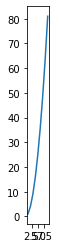

In [5]:
plt.plot(xx, yy)
ax = plt.gca() 
ax.set_aspect(1)

#### Nastavení sítě (grid)

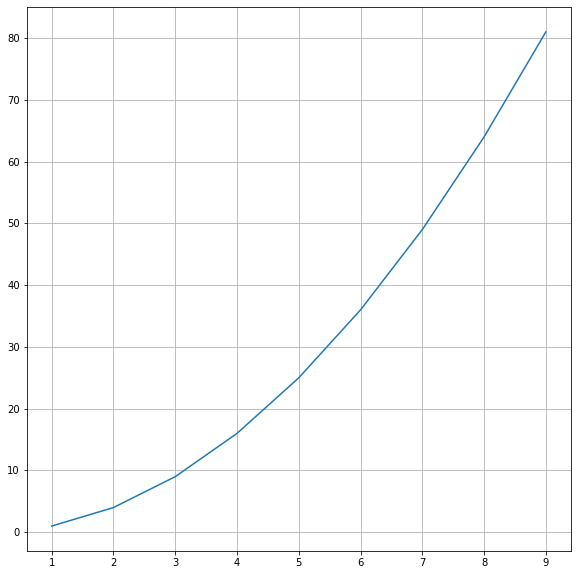

In [9]:
plt.figure(figsize=(20,10))
plt.plot(xx, yy)
ax = plt.gca() 
ax.set_aspect(0.1)
plt.grid('both')

#### Legenda

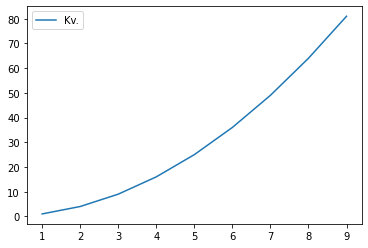

In [120]:
xx = list(range(1, 10, 1))
yy = [f(x) for x in xx]
plt.plot(xx, yy, label='Kv.')
plt.legend();

#### Barvičky

Třetí parametr u příkazu plot nastavuje styl.

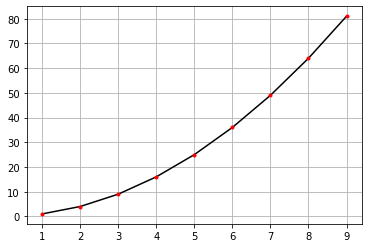

In [16]:
plt.plot(xx, yy, '-k')
plt.plot(xx, yy, '.r')
plt.grid('both')

Všimněte si opakovaného kreslení s různými styly

Dokumentace zde https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Značky
- '.' 
- ','
- 'o'
- 'x'
- '*'
- '<'
- '>'
- '^'
- 'v'

Styly čáry
- '-'
- '--'
- '-.'
- ':'

Barvy
- 'b'
- 'g'
- 'r'
- 'c'
- 'm'
- 'y'
- 'k'
- 'w'

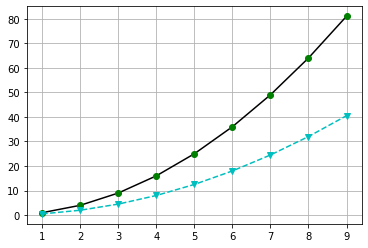

In [22]:
yy2 = [y / 2 for y in yy]
plt.plot(xx, yy, '-k')
plt.plot(xx, yy, 'og')
plt.plot(xx, yy2, 'v--c')
plt.grid('both')

> **Příklad**
>
> Vykreslete průběh funkce sin na intervalu $<-\pi,\pi>$

In [ ]:
from math import pi, sin

xx = []
yy = []
step = # neco
for i in range(100):
    x = #neco
    y = #neco
    # neco
    # neco
    
plt.plot(xx, yy)

> **Řešení**

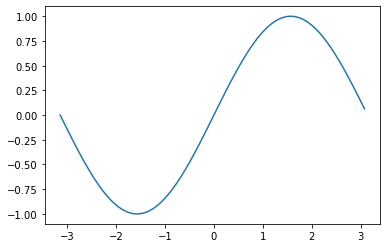

In [52]:
from math import pi, sin

xx = []
yy = []
step = 2 * pi / 100
for i in range(100):
    x = -pi + step * i
    y = sin(x)
    xx.append(x)
    yy.append(y)
    
plt.plot(xx, yy)

#### Doplňkové čáry

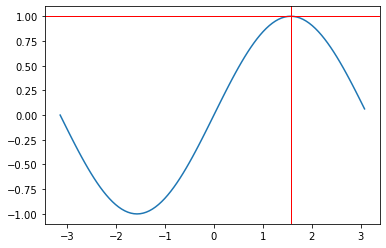

In [61]:
plt.plot(xx, yy)
plt.axhline(1, color='r', linewidth=1)
plt.axvline(pi/2, color='r', linewidth=1)

#### Více výstupů

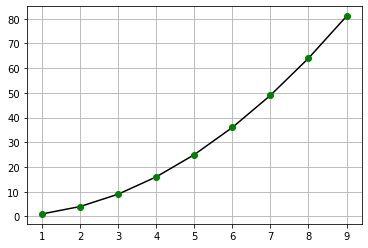

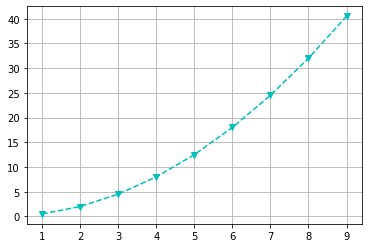

In [23]:
yy2 = [y / 2 for y in yy]
plt.plot(xx, yy, '-k')
plt.plot(xx, yy, 'og')
plt.grid('both')
plt.show()
plt.plot(xx, yy2, 'v--c')
plt.grid('both')
plt.show()

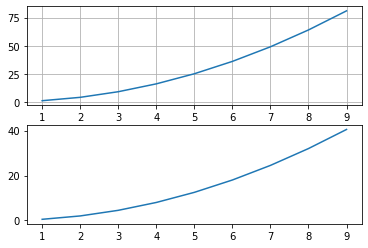

In [28]:
plt.figure(1)
plt.subplot(211)
plt.plot(xx, yy)
plt.grid()
plt.subplot(212)
plt.plot(xx, yy2)

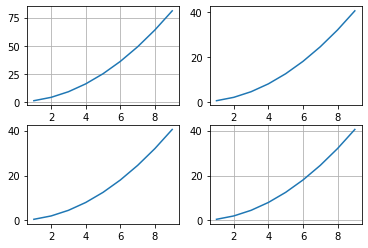

In [33]:
plt.subplot(221) # 2x2, prvni
plt.plot(xx, yy)
plt.grid()
plt.subplot(222) # 2x2, druhy
plt.plot(xx, yy2) 
plt.subplot(223)
plt.plot(xx, yy2)
plt.subplot(224)
plt.plot(xx, yy2)
plt.grid()

#### Projekce

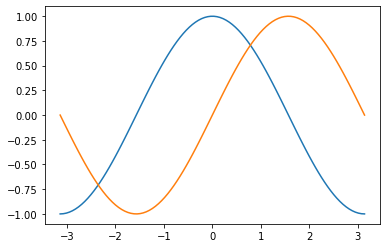

In [38]:
import numpy as np
from math import pi, sin

xx = np.linspace(-pi, pi, 100)
yy1 = np.cos(xx)
yy2 = [sin(x) for x in xx]
plt.plot(xx, yy1, xx, yy2)

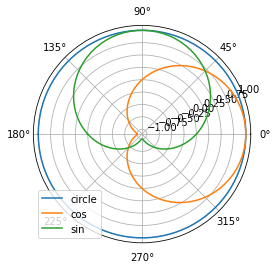

In [122]:
import numpy as np
from math import pi, sin

fig = plt.figure()
plt.axes(polar=True)
xx = np.linspace(-pi, pi, 100)
yy1 = np.cos(xx)
yy2 = [sin(x) for x in xx]
rr = [1 for x in xx]

plt.plot(xx, rr, label='circle')
plt.plot(xx, yy1, label='cos')
plt.plot(xx, yy2, label='sin')

plt.legend();

### Datové grafy

#### Sloupcové

<BarContainer object of 5 artists>

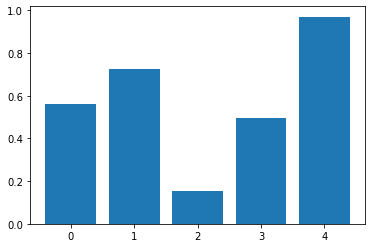

In [63]:
import random
xx = list(range(5))
yy = [random.random() for x in xx]
plt.bar(xx, yy)

Počítaný stack bar

<BarContainer object of 5 artists>

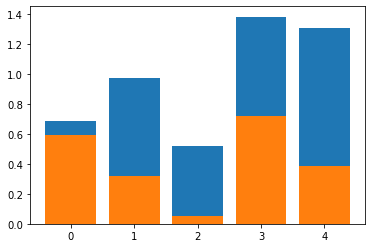

In [70]:
import random
xx = list(range(5))
yy = [random.random() for x in xx]
yy2 = [y + random.random() for x, y in zip(xx, yy)]

plt.bar(xx, yy2)
plt.bar(xx, yy)

Automatický stack bar

<BarContainer object of 5 artists>

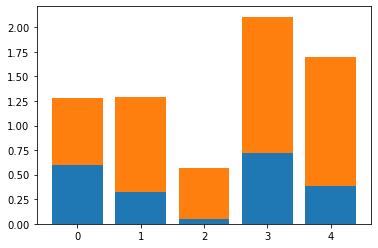

In [71]:
import random
xx = list(range(5))
#yy = [random.random() for x in xx]
#yy2 = [random.random() for x in xx]

plt.bar(xx, yy)
plt.bar(xx, yy2, bottom=yy)

#### Koláčové

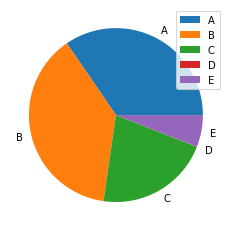

In [124]:
import random
xx = [random.random() for i in range(5)]

plt.pie(xx, labels=['A', 'B', 'C', 'D', 'E'])
plt.legend();

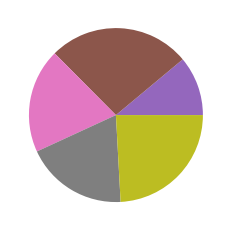

In [110]:
colorList = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.pie(xx, colors = colorList);

Sunburst

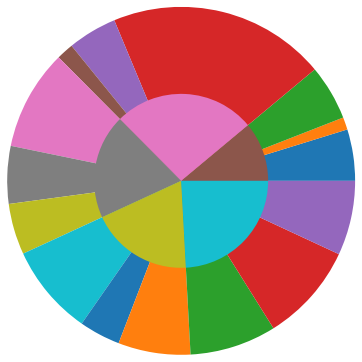

In [112]:
import random
#xx = [random.random() for i in range(5)]

xx2 = []
for x in xx:
    ii = [random.random() for i in range(3)]
    iisum = sum(ii)
    for i in ii:
        xx2.append(i / iisum * x)
    
plt.pie(xx2, radius = 2)
plt.pie(xx);

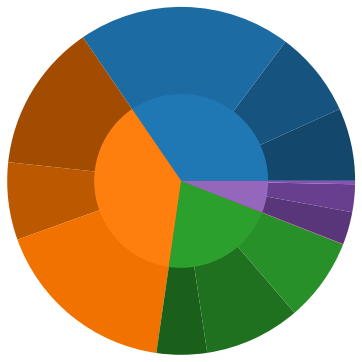

In [126]:
import random

def adjust_lightness(color, amount = 0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls( * mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


colorList = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
xx2 = []
xx2Colors = []
for x, xcolor in zip(xx, colorList):
    ii = [random.random() for i in range(3)]
    iisum = sum(ii)
    for i, adj in zip(ii, [0.6, 0.7, 0.9]):
        xx2.append(i / iisum * x)
        xx2Colors.append(adjust_lightness(xcolor, amount=adj))
    

plt.pie(xx2, radius = 2, colors=xx2Colors)
plt.pie(xx);

#### Histogram

(array([ 955.,  997., 1006., 1022.,  966.,  974.,  975., 1040., 1015.,
        1050.]),
 array([1.89184137e-04, 1.00168519e-01, 2.00147853e-01, 3.00127188e-01,
        4.00106522e-01, 5.00085857e-01, 6.00065191e-01, 7.00044526e-01,
        8.00023861e-01, 9.00003195e-01, 9.99982530e-01]),
 <BarContainer object of 10 artists>)

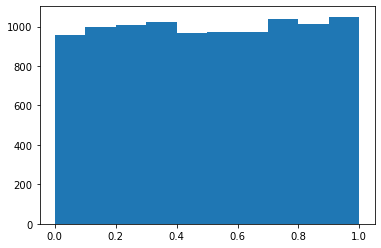

In [72]:
import random

xx = [random.random() for i in range(10000)]

plt.hist(xx)

(array([  955.,  1952.,  2958.,  3980.,  4946.,  5920.,  6895.,  7935.,
         8950., 10000.]),
 array([1.89184137e-04, 1.00168519e-01, 2.00147853e-01, 3.00127188e-01,
        4.00106522e-01, 5.00085857e-01, 6.00065191e-01, 7.00044526e-01,
        8.00023861e-01, 9.00003195e-01, 9.99982530e-01]),
 <BarContainer object of 10 artists>)

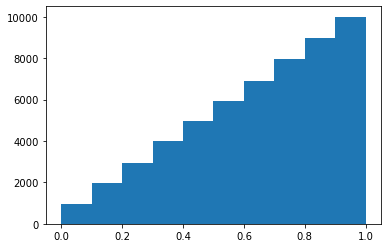

In [73]:
plt.hist(xx, cumulative=True)

(array([ 955.,  997., 1006., 1022.,  966.,  974.,  975., 1040., 1015.,
        1050.]),
 array([1.89184137e-04, 1.00168519e-01, 2.00147853e-01, 3.00127188e-01,
        4.00106522e-01, 5.00085857e-01, 6.00065191e-01, 7.00044526e-01,
        8.00023861e-01, 9.00003195e-01, 9.99982530e-01]),
 <BarContainer object of 10 artists>)

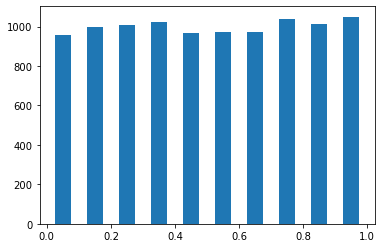

In [74]:
plt.hist(xx, rwidth=0.5)

(array([1024.,  980., 1006., 1018.,  973.,  999., 1010.,  991.,  996.,
        1003.]),
 array([2.40679677e-05, 1.00003743e-01, 1.99983419e-01, 2.99963094e-01,
        3.99942769e-01, 4.99922444e-01, 5.99902120e-01, 6.99881795e-01,
        7.99861470e-01, 8.99841146e-01, 9.99820821e-01]),
 <BarContainer object of 10 artists>)

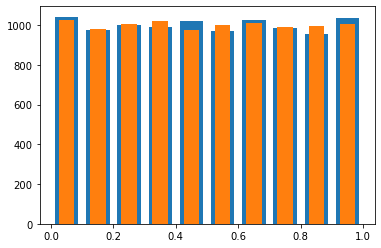

In [76]:
import random

xx = [random.random() for i in range(10000)]
xx2 = [random.random() for i in range(10000)]

plt.hist(xx, rwidth=0.75)
plt.hist(xx2, rwidth=0.5)


(array([[1042.,  975.,  998.,  988., 1022.,  969., 1026.,  985.,  957.,
         1038.],
        [1024.,  981., 1005., 1018.,  974.,  999., 1009.,  992.,  995.,
         1003.]]),
 array([2.40679677e-05, 1.00018308e-01, 2.00012547e-01, 3.00006787e-01,
        4.00001027e-01, 4.99995267e-01, 5.99989506e-01, 6.99983746e-01,
        7.99977986e-01, 8.99972226e-01, 9.99966465e-01]),
 <a list of 2 BarContainer objects>)

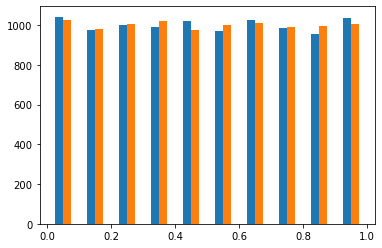

In [81]:
plt.hist([xx, xx2], rwidth=0.5)

(array([[1042.,  975.,  998.,  988., 1022.,  969., 1026.,  985.,  957.,
         1038.],
        [2066., 1956., 2003., 2006., 1996., 1968., 2035., 1977., 1952.,
         2041.]]),
 array([2.40679677e-05, 1.00018308e-01, 2.00012547e-01, 3.00006787e-01,
        4.00001027e-01, 4.99995267e-01, 5.99989506e-01, 6.99983746e-01,
        7.99977986e-01, 8.99972226e-01, 9.99966465e-01]),
 <a list of 2 BarContainer objects>)

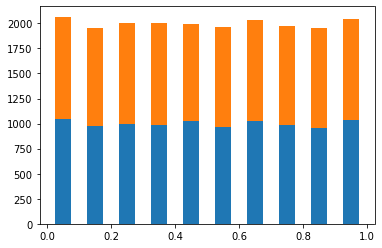

In [79]:
plt.hist([xx, xx2], rwidth=0.5, stacked=True)